In [14]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('datasets/iris.txt', delimiter=',')
y = data[:,-1]
X = data[:,:-1]
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [15]:
# normalize the data to zero mean and unit variance
normed = (X - X.mean(axis=0)) / X.std(axis=0)
normed.mean(axis=0), normed.std(axis=0)

(array([-1.69031455e-15, -1.63702385e-15, -1.48251781e-15, -1.62314606e-15]),
 array([1., 1., 1., 1.]))

In [16]:
[U, S, V] = np.linalg.svd(normed)
S, V

(array([20.89551896, 11.75513248,  4.7013819 ,  1.75816839]),
 array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
        [-0.37231836, -0.92555649, -0.02109478, -0.06541577],
        [ 0.72101681, -0.24203288, -0.14089226, -0.6338014 ],
        [ 0.26199559, -0.12413481, -0.80115427,  0.52354627]]))

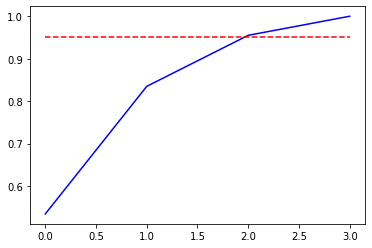

In [17]:
eigvalues = np.sort(S)[::-1]
cumulative_variance = []
sum = 0
for i in eigvalues:
    sum += i.real / eigvalues.sum().real
    cumulative_variance.append(sum)

plt.plot(cumulative_variance, 'b-')
plt.plot([0, 3], [0.95, 0.95], 'r--')

plt.savefig('cumul_var.png')

In [18]:
# get the eigenvector for the largest eigenvalue
B = np.vstack((V[0], V[1])).T
B

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

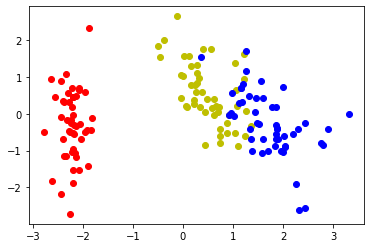

In [19]:
projections = normed@B
versicolor = projections[:50]
setosa = projections[50:100]
virginica = projections[100:]

plt.plot(versicolor[:,0], versicolor[:,1], 'ro')
plt.plot(setosa[:,0], setosa[:,1], 'yo')
plt.plot(virginica[:,0], virginica[:,1], 'bo')

plt.savefig('pca_class.png')

In [13]:
def nrmse(reconstruction):
    return np.sqrt(((X - reconstruction)**2).mean(axis=0)) / X.std(axis=0)

def reconstruct(B, normed):
    # apply PCA
    proj = normed@B
    # reconstruct
    normed = proj@B.T
    # revert normalization
    return normed * X.std(axis=0) + X.mean(axis=0)

B1 = V[0].reshape((4,1))
B2 = np.vstack((V[0], V[1])).T
B3 = np.vstack((V[0], V[1], V[2])).T
B4 = np.vstack((V[0], V[1], V[2], V[3])).T

#print reconstruction errors
print(nrmse(reconstruct(B1, normed)))
print(nrmse(reconstruct(B2, normed)))
print(nrmse(reconstruct(B3, normed)))
print(nrmse(reconstruct(B4, normed)))


[0.45356249 0.89337442 0.12869347 0.26226538]
[0.27931773 0.09460177 0.12709081 0.254639  ]
[0.03761047 0.01782003 0.11500878 0.07515708]
[5.76204028e-16 1.09077924e-15 7.53171048e-16 7.56964913e-16]
